In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
df = pd.read_csv('/content/processed_travel_data.csv')

In [7]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,CustSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Single,1.0,1,2,1,0.0,Manager,20993.0,41-50,<25000
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,41-50,<25000
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Single,7.0,1,3,0,0.0,Executive,17090.0,31-40,<20000
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,31-40,<20000
4,200004,0,32.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,31-40,<20000


In [8]:
print(df.isnull().sum())

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
RoomTaken                   0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
CustSatisfactionScore       0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Agebin                      0
Incomebin                   0
dtype: int64


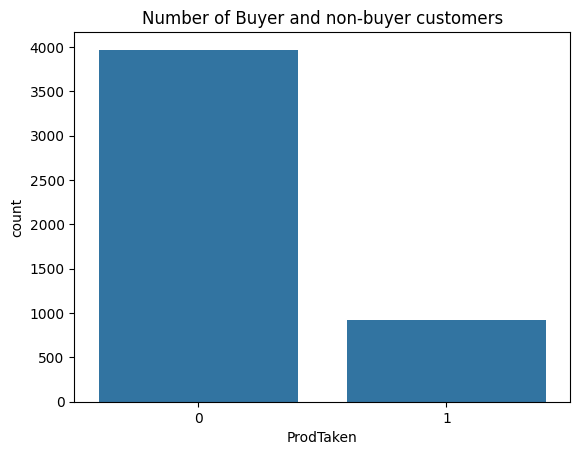

In [9]:
sns.countplot(x='ProdTaken', data=df) # 1 = bought, 0 = not bought
plt.title('Number of Buyer and non-buyer customers')
plt.show()

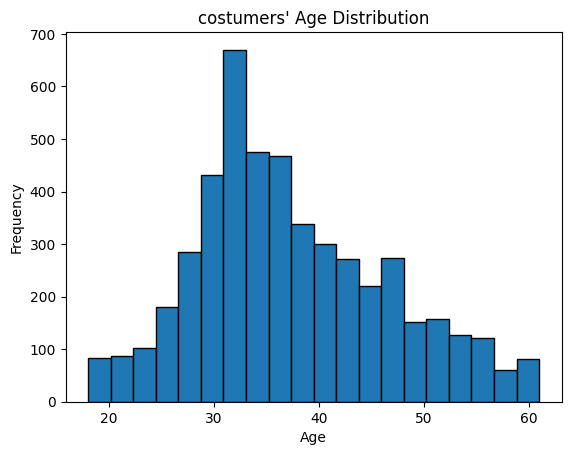

In [10]:
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.title('costumers\' Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

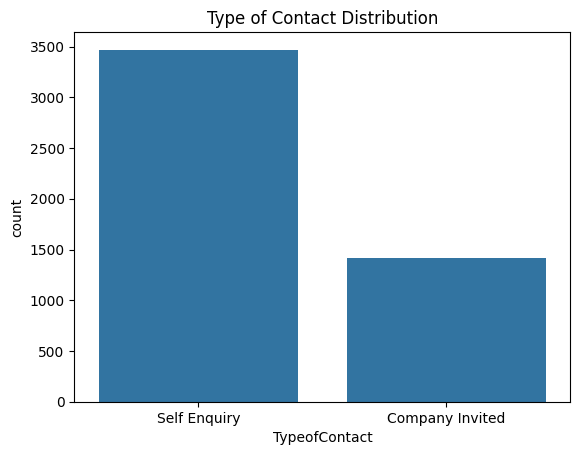

In [11]:
sns.countplot(x='TypeofContact', data=df)
plt.title('Type of Contact Distribution')
plt.show()

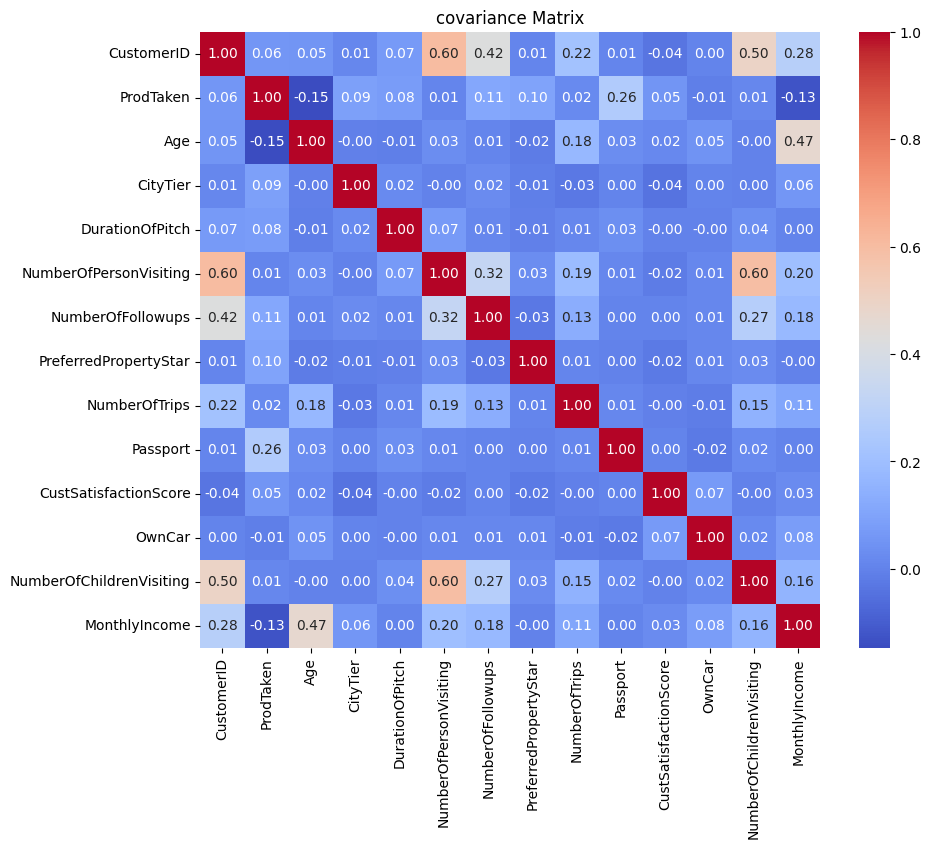

In [12]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('covariance Matrix')
plt.show()

In [13]:
print(df.dtypes)

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
RoomTaken                    object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
CustSatisfactionScore         int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
Agebin                       object
Incomebin                    object
dtype: object


In [14]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("non numeric columns:", non_numeric_cols)


non numeric columns: Index(['TypeofContact', 'Occupation', 'Gender', 'RoomTaken', 'MaritalStatus',
       'Designation', 'Agebin', 'Incomebin'],
      dtype='object')


In [15]:
le = LabelEncoder()
categorical_cols = ['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'Agebin', 'Incomebin']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [16]:
df = df.drop('CustomerID', axis=1)

In [17]:
print("Befor filling: ")
print(df.isnull().sum())

# filling only for numeric cols
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

print("after filling: ")
print(df.isnull().sum())

Befor filling: 
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
RoomTaken                   0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
CustSatisfactionScore       0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Agebin                      0
Incomebin                   0
dtype: int64
after filling: 
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
RoomTaken                   0
PreferredPropertyStar    

In [18]:
# make sure everything is numeric
X = df.drop('ProdTaken', axis=1)

# make sure columns are numeric
print("different Type in X: ")
print(X.dtypes)

#if non numeric col exist remove it or encode it
non_numeric_in_X = X.select_dtypes(include=['object']).columns
if len(non_numeric_in_X) > 0:
    print("remaining non numeric cols: ", non_numeric_in_X)
    for col in non_numeric_in_X:
        X[col] = le.fit_transform(X[col].astype(str))

y = df['ProdTaken']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)


different Type in X: 
Age                         float64
TypeofContact                 int64
CityTier                      int64
DurationOfPitch             float64
Occupation                    int64
Gender                        int64
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
RoomTaken                    object
PreferredPropertyStar       float64
MaritalStatus                 int64
NumberOfTrips               float64
Passport                      int64
CustSatisfactionScore         int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                   int64
MonthlyIncome               float64
Agebin                        int64
Incomebin                     int64
dtype: object
remaining non numeric cols:  Index(['RoomTaken'], dtype='object')


In [19]:
print("PCA explained variance: ", pca.explained_variance_ratio_)
print("Sum of PCA explained variance:", sum(pca.explained_variance_ratio_))

PCA explained variance:  [0.18395555 0.0963514  0.06645838 0.05799442 0.05667223]
Sum of PCA explained variance: 0.461431993163238


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [21]:
#Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred_rf),'\n')
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_rf),'\n')
print("classification_report: \n",classification_report(y_test, y_pred_rf))

Accuracy of Random Forest: 0.8312883435582822 

confusion_matrix: 
 [[770  17]
 [148  43]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       787
           1       0.72      0.23      0.34       191

    accuracy                           0.83       978
   macro avg       0.78      0.60      0.62       978
weighted avg       0.81      0.83      0.79       978



In [22]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("Accuracy of KNN:", accuracy_score(y_test, y_pred_knn),'\n')
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_knn),'\n')
print("classification_report: \n",classification_report(y_test, y_pred_knn),'\n')

Accuracy of KNN: 0.7995910020449898 

confusion_matrix: 
 [[743  44]
 [152  39]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       787
           1       0.47      0.20      0.28       191

    accuracy                           0.80       978
   macro avg       0.65      0.57      0.58       978
weighted avg       0.76      0.80      0.77       978
 



Purchase rate by income group:
Incomebin
0    0.000000
1    0.000000
2    0.273603
3    0.184337
4    0.152344
5    0.102094
6    0.101942
Name: ProdTaken, dtype: float64


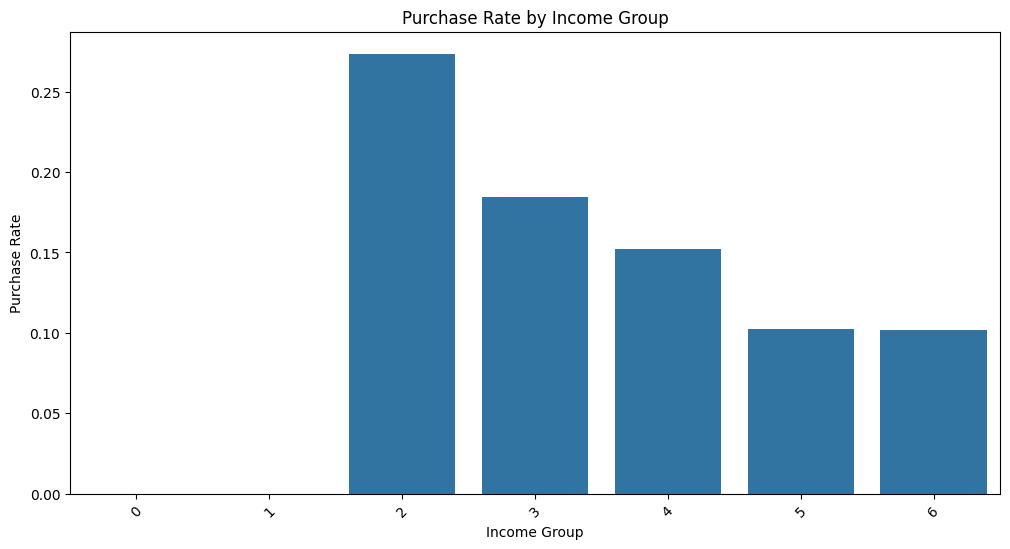

In [26]:
# Income
incomebin_analysis = df.groupby('Incomebin')['ProdTaken'].mean()
print("Purchase rate by income group:")
print(incomebin_analysis)

plt.figure(figsize=(12, 6))
sns.barplot(x=incomebin_analysis.index, y=incomebin_analysis.values)
plt.title('Purchase Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Purchase Rate')
plt.xticks(rotation=45)
plt.show()

In [32]:

# Find best income group
best_income_group = incomebin_analysis.idxmax()
best_income_rate = incomebin_analysis.max()
print(f"Best income group: {best_income_group} with conversion rate {best_income_rate:.2%}")
print('\n')
print("Focus on customers with higher income (higher Incomebin)")

Best income group: 2 with conversion rate 27.36%


Focus on customers with higher income (higher Incomebin)


Purchase rate by age group:
Agebin
0    0.412104
1    0.253659
2    0.149947
3    0.134203
4    0.162113
Name: ProdTaken, dtype: float64


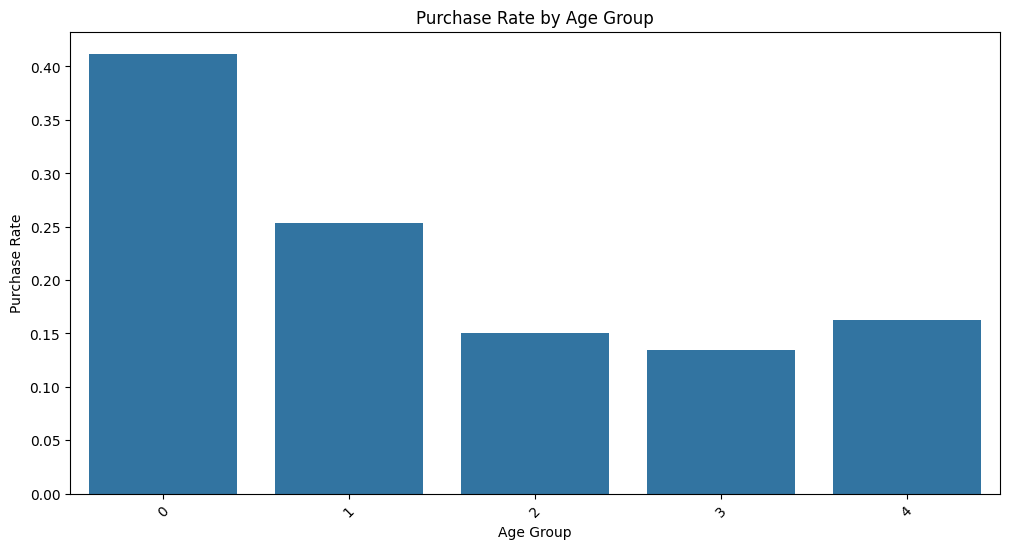

In [28]:
# Age
agebin_analysis = df.groupby('Agebin')['ProdTaken'].mean()
print("Purchase rate by age group:")
print(agebin_analysis)

plt.figure(figsize=(12, 6))
sns.barplot(x=agebin_analysis.index, y=agebin_analysis.values)
plt.title('Purchase Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Rate')
plt.xticks(rotation=45)
plt.show()

In [31]:
best_age_group = agebin_analysis.idxmax()
best_age_rate = agebin_analysis.max()
print(f"Best age group: {best_age_group} with conversion rate {best_age_rate:.2%}")
print('\n')
print("Target customers aged 31-50 years")

Best age group: 0 with conversion rate 41.21%


Target customers aged 31-50 years
